# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [75]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [76]:
# Create empty lists to hold the retrieved data

# test_cities is a small list of cities used for testing the code
test_cities = ["charlotte", "sydney", "xyz", "cairo"]

city_name = []
city_id = []
date = []
lat = []
max_temp = []
humid = []
wind = []
clouds = []

# create url for api calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
format_url = f"{url}appid={api_key}&units={units}&q="

# make the requests and load the requested data into lists
count = 0
for c in cities:
    count += 1
    query_url = f"{format_url}{c}"
    #response = requests.get(query_url).json()
    try:
        response = requests.get(query_url).json()
        city_name.append(response['name'])
        city_id.append(response['id'])
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        date.append(response['dt'])
    except:
        print('City not found. Skipping......')
    #pprint(response)
    print(f'Processing record {count} | {c}')
    print(f'{query_url + c}')




City not found. Skipping......
Processing record 1 | belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=3a0a0fa80d8c1600856bc8b7862dd174&units=imperial&q=belushya gubabelushya guba
Processing record 2 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=3a0a0fa80d8c1600856bc8b7862dd174&units=imperial&q=cherskiycherskiy
Processing record 3 | necochea
http://api.openweathermap.org/data/2.5/weather?appid=3a0a0fa80d8c1600856bc8b7862dd174&units=imperial&q=necocheanecochea
Processing record 4 | halifax
http://api.openweathermap.org/data/2.5/weather?appid=3a0a0fa80d8c1600856bc8b7862dd174&units=imperial&q=halifaxhalifax
Processing record 5 | grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=3a0a0fa80d8c1600856bc8b7862dd174&units=imperial&q=grand gaubegrand gaube
Processing record 6 | huarmey
http://api.openweathermap.org/data/2.5/weather?appid=3a0a0fa80d8c1600856bc8b7862dd174&units=imperial&q=huarmeyhuarmey
Processing record 7 | busselton
http://api.op

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:
# Create a dictionary from the weather data lists. Used to create dataframe
# create a data frame from openweathermap response

weather_dict = {
    'City': city_name,
    'City ID': city_id,
    'Latitude': lat,
    'Max Temp': max_temp,
    'Humidity': humid,
    'Wind Speed': wind,
    '% Clouds': clouds,
    'Date': time.strftime('%m/%d/%y')  
}
weather_dict

weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv('weather_data.csv')
weather_df.head()


,City,City ID,Latitude,Max Temp,Humidity,Wind Speed,% Clouds,Date
0,Cherskiy,2126199,68.75,-32.24,56,2.82,24,01/14/19
1,Necochea,3430443,-38.55,77.20,69,10.98,24,01/14/19
2,Halifax,6324729,44.65,21.20,57,5.82,75,01/14/19
3,Grand Gaube,934479,-20.01,80.60,74,9.17,40,01/14/19
4,Huarmey,3939168,-10.07,76.62,63,4.72,32,01/14/19


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

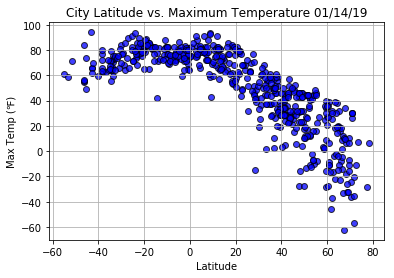

In [78]:
# Create the scatter plot for latitude v temp using the weather_df dataframe
current_date = time.strftime('%m/%d/%y')

plt.scatter(weather_df['Latitude'], weather_df['Max Temp'], c='blue', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
current_date = time.strftime('%m/%d/%y')
plt.title(f'City Latitude vs. Maximum Temperature {current_date}')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (℉)")
plt.grid()

#### Latitude vs. Humidity Plot

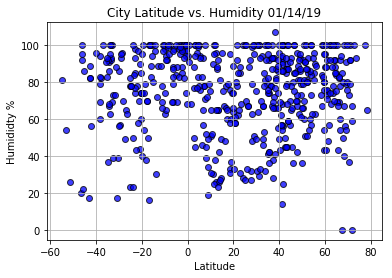

In [79]:
# Create the scatter plot for humidity v temp.
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], c='blue', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
current_date = time.strftime('%m/%d/%y')
plt.title(f'City Latitude vs. Humidity {current_date}')
plt.xlabel("Latitude")
plt.ylabel("Humididty %")
plt.grid()

#### Latitude vs. Cloudiness Plot

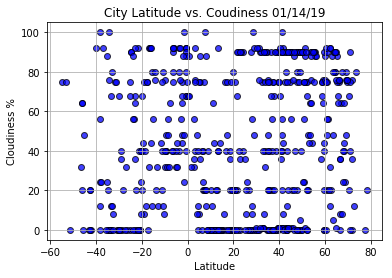

In [80]:
# Create the scatter plot for clouds v temp.
plt.scatter(weather_df['Latitude'], weather_df['% Clouds'], c='blue', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
current_date = time.strftime('%m/%d/%y')
plt.title(f'City Latitude vs. Coudiness {current_date}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

#### Latitude vs. Wind Speed Plot

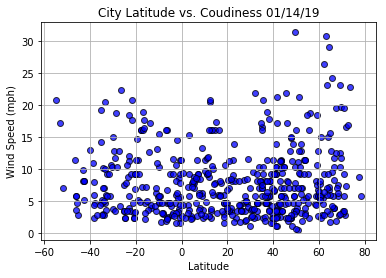

In [81]:
# Create the scatter plot for wind v temp.
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'], c='blue', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
current_date = time.strftime('%m/%d/%y')
plt.title(f'City Latitude vs. Coudiness {current_date}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()